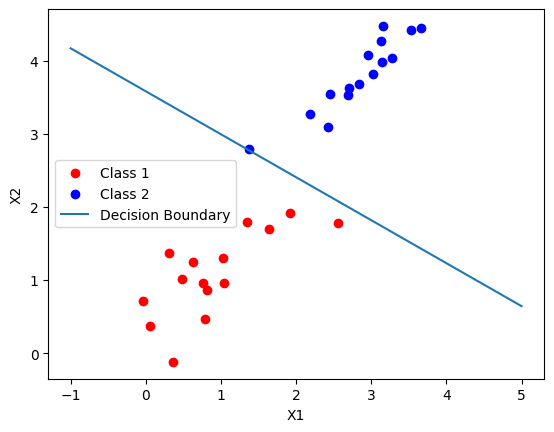

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[1, 1], [3, 4]]
cov = [[0.4, 0.3], [0.3, 0.4]]
N = 15
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1 * np.ones((1, N))), axis=1)
X = np.concatenate((np.ones((1, 2 * N)), X), axis=0)
def h(w, x):
    return np.sign(np.dot(w.T, x))
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)

        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
weights = w[-1].flatten()
plt.scatter(X0[0, :], X0[1, :], color='r', label='Class 1')
plt.scatter(X1[0, :], X1[1, :], color='b', label='Class 2')
x_values = np.linspace(-1, 5, 100)
y_values = -(weights[1] * x_values + weights[0]) / weights[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
